# transmon_cont_env

In [8]:
# copy file to modify here

In [1]:
import gym
import gym_transmon_cont
from gym_utils import *

# Two-qubit examples
## sqrtZX - quspin

In [6]:
# physical setting
sim_name = 'quspin'
num_transmon = 2
num_level = 3
sim_frame_rotation = False
drive = np.array([100*MHz, 14*MHz])
detune = np.array([115*MHz, 0])
anharm = np.array([-319.7*MHz, -320.2*MHz])
coupling = np.array([1.87*MHz])
ctrl_noise = 0

# objective
num_seg = 100
duration = 224 #in ns
duration_gauss = int(73/duration*num_seg)
duration_const = int(115/duration*num_seg)
duration_drag = int(36/duration*num_seg)
dt = duration/num_seg*nanosec
target_gate = 'sqrtZX'

# state
rl_state = 'ket'
pca_order = (4,2)

# reward
reward_type = 'average'
reward_scheme = 'local-fidelity-difference'
fid_threshold = 0.999
worstfid_method = 'SLSQP-ket-7'

# action
action_size = 4
sub_action_scale = None
end_amp_window = None
evolve_method = 'exact'

kw = initialize_transmon_env(sim_name,num_transmon, num_level, sim_frame_rotation,
                             drive, detune, anharm, coupling, ctrl_noise,
                             num_seg, dt, target_gate,
                             rl_state, pca_order,
                             reward_type, reward_scheme, fid_threshold, worstfid_method,
                             action_size, sub_action_scale, end_amp_window, evolve_method)
# env = ContinuousTransmonEnv(**kw)
env = gym.make('transmon-cont-v7',**kw)

---Initiating Transmon Environment with Continuous Action---
-   Noiseless control


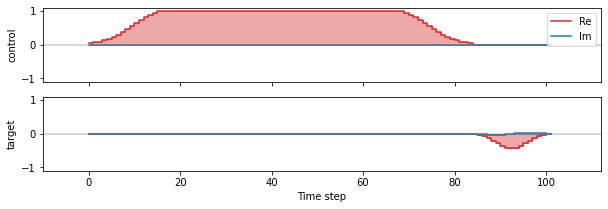

-----------------------------------------------
Average fidelity:    0.9941521407860391
Worst case fidelity: 0.9899311848415232


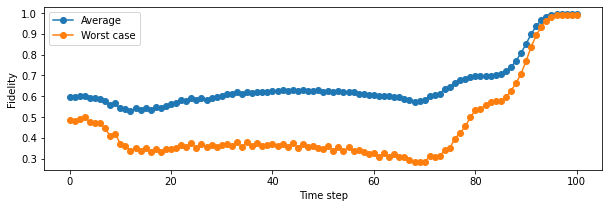

Max worst case fidelity: 0.990893315112999 at step 100


0.09351152570522347

In [7]:
# cross-resonance
sig = 14.5/(duration/num_seg)
amp = 1
phase = 0

x_gauss = np.linspace(0,duration_gauss,duration_gauss+1)
x_const = np.ones(duration_const)
cr1_pulse = cr1(x_gauss,x_const,amp,sig,phase)

# drag
sig = 7.3/(duration/num_seg)
amp = -0.43
beta = 0.4

x_drag = np.linspace(0,duration_drag,duration_drag+1)
drag_pulse = drag(x_drag,amp,beta,sig)

# combine
cr1_total_pulse = np.hstack([cr1_pulse,np.zeros_like(cr1_pulse)])
drag_total_pulse = np.hstack([np.zeros_like(drag_pulse),drag_pulse])
total_pulse = np.vstack([cr1_total_pulse,drag_total_pulse])

channel_labels = ['control','target']
plot_pulse(total_pulse,channel_labels)
plt.show()

# run environment
env.step_params['reward_type'] = 'average'
env.reset()
avg_fids = []
states = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    avg_fids.append(env.fid)
    states.append(state)
avg_fids = np.array(avg_fids)
states = np.array(states)

env.step_params['reward_type'] = 'worst'
env.reset()
worst_fids = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    worst_fids.append(env.fid)
worst_fids = np.array(worst_fids)

print('-----------------------------------------------')
print(f'Average fidelity:    {avg_fids[-1]}')
print(f'Worst case fidelity: {worst_fids[-1]}')

plt.figure(figsize=(10,3))
plt.plot(avg_fids,'o-',label='Average')
plt.plot(worst_fids,'o-',label='Worst case')
plt.xlabel('Time step')
plt.ylabel('Fidelity')
plt.legend()
plt.show()
print(f'Max worst case fidelity: {worst_fids.max()} at step {worst_fids.argmax()+1}')
abs(total_pulse[1:]-total_pulse[:-1]).max()

## sqrtZX - TransmonDuffingSimulator

In [2]:
# physical setting
sim_name = 'TransmonDuffingSimulator'
num_transmon = 2
num_level = 3
sim_frame_rotation = False

anharm   = 2*np.pi * np.array([-319.7,-320.2])*MHz
drive    = 2*np.pi * np.array([28,200,28,200])*MHz
detune   = 2*np.pi * np.array([115,0])*MHz
coupling = 2*np.pi * np.array([1.87])*MHz

ctrl_noise = 0

# objective
num_seg = 100
duration = 224 #in ns
duration_gauss = int(73/duration*num_seg)
duration_const = int(115/duration*num_seg)
duration_drag = int(36/duration*num_seg)
dt = duration/num_seg*nanosec
target_gate = 'sqrtZX'

# state
rl_state = 'ket'
pca_order = (4,2)

# reward
reward_type = 'average'
reward_scheme = 'local-fidelity-difference'
fid_threshold = 0.999
worstfid_method = 'SLSQP-ket-7'

# action
channels = [2,3,4,5]
sub_action_scale = None
end_amp_window = None
evolve_method = 'exact'

kw = initialize_transmon_env(sim_name,num_transmon, num_level, sim_frame_rotation,
                             drive, detune, anharm, coupling, ctrl_noise,
                             num_seg, dt, target_gate,
                             rl_state, pca_order,
                             reward_type, reward_scheme, fid_threshold, worstfid_method,
                             channels, sub_action_scale, end_amp_window, evolve_method)
# env = ContinuousTransmonEnv(**kw)
env = gym.make('transmon-cont-v7',**kw)

---Initiating Transmon Environment with Continuous Action---
-   Noiseless control


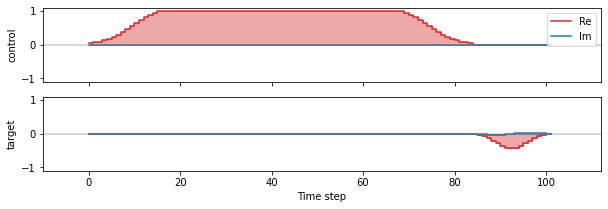

-----------------------------------------------
Average fidelity:    0.9941521407860294
Worst case fidelity: 0.9902670339452255


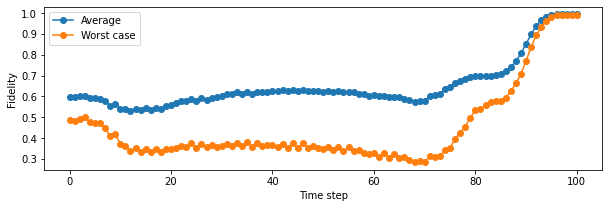

Max worst case fidelity: 0.9908957980764921 at step 100


0.09351152570522347

In [3]:
# cross-resonance
sig = 14.5/(duration/num_seg)
amp = 1
phase = 0

x_gauss = np.linspace(0,duration_gauss,duration_gauss+1)
x_const = np.ones(duration_const)
cr1_pulse = cr1(x_gauss,x_const,amp,sig,phase)

# drag
sig = 7.3/(duration/num_seg)
amp = -0.43
beta = 0.4

x_drag = np.linspace(0,duration_drag,duration_drag+1)
drag_pulse = drag(x_drag,amp,beta,sig)

# combine
cr1_total_pulse = np.hstack([cr1_pulse,np.zeros_like(cr1_pulse)])
drag_total_pulse = np.hstack([np.zeros_like(drag_pulse),drag_pulse])
total_pulse = np.vstack([cr1_total_pulse,drag_total_pulse])

channel_labels = ['control','target']
plot_pulse(total_pulse,channel_labels)
plt.show()

# run environment
env.step_params['reward_type'] = 'average'
env.reset()
avg_fids = []
states = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    avg_fids.append(env.fid)
    states.append(state)
avg_fids = np.array(avg_fids)
states = np.array(states)

env.step_params['reward_type'] = 'worst'
env.reset()
worst_fids = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    worst_fids.append(env.fid)
worst_fids = np.array(worst_fids)

print('-----------------------------------------------')
print(f'Average fidelity:    {avg_fids[-1]}')
print(f'Worst case fidelity: {worst_fids[-1]}')

plt.figure(figsize=(10,3))
plt.plot(avg_fids,'o-',label='Average')
plt.plot(worst_fids,'o-',label='Worst case')
plt.xlabel('Time step')
plt.ylabel('Fidelity')
plt.legend()
plt.show()
print(f'Max worst case fidelity: {worst_fids.max()} at step {worst_fids.argmax()+1}')
abs(total_pulse[1:]-total_pulse[:-1]).max()

## SWAP - TransmonDuffingSimulator

In [2]:
# physical setting
sim_name = 'TransmonDuffingSimulator'
num_transmon = 2
num_level = 3
sim_frame_rotation = False

dt = 4*nanosec
anharm   = 2*np.pi * np.array([-319.7,-320.2])*MHz
drive    = 2*np.pi * np.array([30,300,30,300])*MHz
detune   = 2*np.pi * np.array([115,0])*MHz
coupling = 2*np.pi * np.array([1.87])*MHz
ctrl_noise = 0

# objective
num_seg = 160
target_gate = 'SWAP'

# state
rl_state = 'ket'
pca_order = (4,2)

# reward
reward_type = 'average'
reward_scheme = 'local-fidelity-difference'
fid_threshold = 0.999
worstfid_method = 'SLSQP-ket-7'

# action
channels = list(range(8))
# action_size = 8
sub_action_scale = None
end_amp_window = None
evolve_method = 'exact'

kw = initialize_transmon_env(sim_name,num_transmon, num_level, sim_frame_rotation,
                             drive, detune, anharm, coupling, ctrl_noise,
                             num_seg, dt, target_gate,
                             rl_state, pca_order,
                             reward_type, reward_scheme, fid_threshold, worstfid_method,
                             channels, sub_action_scale, end_amp_window, evolve_method)
env = gym.make('transmon-cont-v7',**kw)
# env = ContinuousTransmonEnv(**kw)

---Initiating Transmon Environment with Continuous Action---
-   Noiseless control


-----------------------------------------------
Final fidelities
  Average: 0.9885
  Worst  : 0.9778
Max worst-case fidelity: 0.9778 at step 160


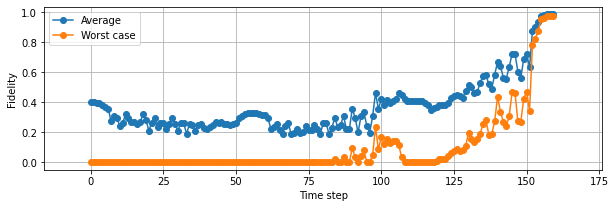

Max amp difference: 0.44


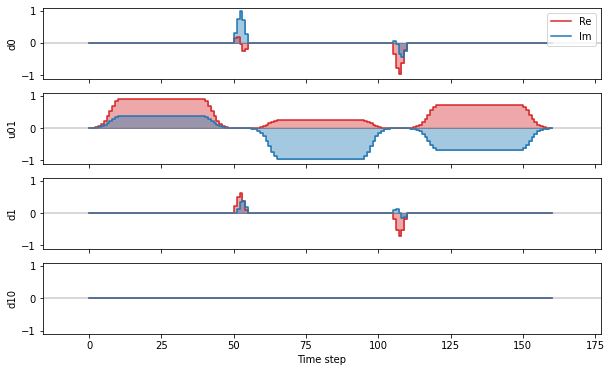

In [3]:
# Saved optimized angles
x_X90I = np.array([ 1.        ,  0.25705079, -0.46631134, -1.33888415])
x_IX90 = np.array([ 0.71479103,  0.24319973, -0.41055427, -0.11303429])
x_CNOT = np.array([ 0.45272866,  1.        ,  0.15123441, -0.15832501])
x_SWAP = np.array([ 0.40192683, 1.60814476 ,  0.50891225, -1.31562956, 
                   -2.81163055, -3.13722026, -0.74656652])

channel_labels = ['d0','u01','d1','d10']

drag_pulse_0 = DRAG(5, *x_X90I[:-1])
drag_pulse_1 = DRAG(5, *x_IX90[:-1])
GS_pulse = GaussianSquare(50, *x_CNOT[:-1])

cnot_pulse_1 = np.zeros([len(GS_pulse),8])
cnot_pulse_1[:,2:4] = Z_shift(GS_pulse,x_SWAP[0])

hh_pulse_1 = np.zeros([len(drag_pulse_0),8])
hh_pulse_1[:, :2] = Z_shift(drag_pulse_0,x_SWAP[1])
hh_pulse_1[:,4:6] = Z_shift(drag_pulse_1,x_SWAP[2])

cnot_pulse_2 = np.zeros([len(GS_pulse),8])
cnot_pulse_2[:,2:4] = Z_shift(GS_pulse,x_SWAP[3])

hh_pulse_2 = np.zeros([len(drag_pulse_0),8])
hh_pulse_2[:, :2] = Z_shift(drag_pulse_0,x_SWAP[4])
hh_pulse_2[:,4:6] = Z_shift(drag_pulse_1,x_SWAP[5])

cnot_pulse_3 = np.zeros([len(GS_pulse),8])
cnot_pulse_3[:,2:4] = Z_shift(GS_pulse,x_SWAP[6])

total_pulse = np.vstack([cnot_pulse_1,hh_pulse_1,
                         cnot_pulse_2,hh_pulse_2,cnot_pulse_3])

max_diff = abs(total_pulse[1:,:]-total_pulse[:-1,:]).max()

# run environment
env.step_params['reward_type'] = 'average'
env.reset()
avg_fids = []
states = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    avg_fids.append(env.fid)
    states.append(state)
avg_fids = np.array(avg_fids)
states = np.array(states)

env.step_params['reward_type'] = 'worst'
env.reset()
worst_fids = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    worst_fids.append(env.fid)
worst_fids = np.array(worst_fids)

print('-----------------------------------------------')
print('Final fidelities')
print(f'  Average: {avg_fids[-1]:.4f}')
print(f'  Worst  : {worst_fids[-1]:.4f}')
print(f'Max worst-case fidelity: {worst_fids.max():.4f} at step {worst_fids.argmax()+1}')

plt.figure(figsize=(10,3))
plt.plot(avg_fids,'o-',label='Average')
plt.plot(worst_fids,'o-',label='Worst case')
plt.xlim([-int(0.1*len(total_pulse)),len(total_pulse)+int(0.1*len(total_pulse))])
plt.xlabel('Time step')
plt.ylabel('Fidelity')
plt.legend()
plt.grid()
plt.show()

print(f'Max amp difference: {max_diff:.2f}')
plot_pulse(total_pulse,channel_labels)

In [8]:
(0.99**19)*3

2.47850587150676

In [18]:
gamma = 0.95
1/(1-gamma)

19.999999999999982

In [4]:
import tensorboardX

In [67]:
dFavg = avg_fids-np.hstack([[env.avg_fid],avg_fids[:-1]])
env.reset()
print(avg_fids[-1])
env.avg_fid+dFavg.sum()

0.9884709348088542


0.9884709348088542

In [69]:
dNLI = NLI(avg_fids)-NLI(np.hstack([[env.avg_fid],avg_fids[:-1]]))
print(NLI(avg_fids[-1]))
NLI(env.avg_fid)+dNLI.sum()

1.9382059050891387


1.9382059050891387

In [47]:
env.avg_fid

0.4

0.9885823077527688

In [25]:
NLI(avg_fids[-1])

1.9382059050891387

In [50]:
dNLI = dFavg/(1-Favg)/np.log(10)
# dNLI = dFavg/(1-avg_fids[:-1])/np.log(10)
NLI(env.avg_fid)+dNLI.sum()

1.8555099449465462

In [57]:
print(avg_fids[-1])
NLI(avg_fids[-1])

0.9884709348088542


1.9382059050891387

In [58]:
dNLI = NLI(avg_fids)[1:]-NLI(avg_fids)[:-1]
NLI(env.avg_fid)+dNLI.sum()

1.9382865120331354

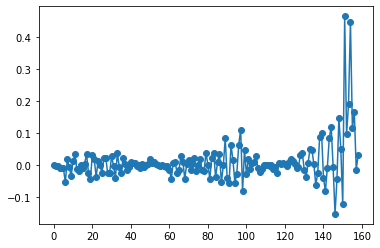

In [59]:
plt.plot(dNLI,'o-')

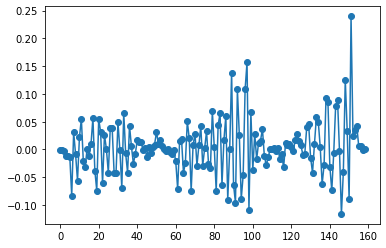

In [60]:
plt.plot(dFavg,'o-')

In [100]:
a = np.random.random((10,4)).round(3)
b = np.zeros((10,8))
channels = [0,1,4,5]
b[:,channels] = a
b

array([[0.998, 0.666, 0.   , 0.   , 0.262, 0.329, 0.   , 0.   ],
       [0.355, 0.361, 0.   , 0.   , 0.55 , 0.497, 0.   , 0.   ],
       [0.064, 0.789, 0.   , 0.   , 0.411, 0.81 , 0.   , 0.   ],
       [0.89 , 0.887, 0.   , 0.   , 0.516, 0.805, 0.   , 0.   ],
       [0.087, 0.708, 0.   , 0.   , 0.899, 0.337, 0.   , 0.   ],
       [0.641, 0.424, 0.   , 0.   , 0.446, 0.185, 0.   , 0.   ],
       [0.265, 0.269, 0.   , 0.   , 0.167, 0.97 , 0.   , 0.   ],
       [0.151, 0.645, 0.   , 0.   , 0.237, 0.76 , 0.   , 0.   ],
       [0.504, 0.97 , 0.   , 0.   , 0.623, 0.308, 0.   , 0.   ],
       [0.732, 0.394, 0.   , 0.   , 0.266, 0.552, 0.   , 0.   ]])

In [87]:
np.stack([channels,np.array(channels)+1

array([1, 4])